## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [12]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom, norm
from math import factorial
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Forma manbual
def my_binomial(k, n, p):
    return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [14]:
my_binomial(2, 3, 0.5)

0.375

In [15]:
3/8.0

0.375

In [16]:
# Usando librerias
dist = binom(3, 0.5)
dist.pmf(2) # Funcion de dencidad de probabilidad

np.float64(0.3750000000000003)

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

In [17]:
dist = binom(3, 0.5)
dist.cdf(2) # Funcion de probabilidad acumulada

np.float64(0.875)

In [18]:
7/8.0

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [19]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p = 0.5
n = 3
binomial(n, p)

3

In [20]:
arr = []
for _ in range(100):
    arr.append(binomial(n, p))

print(arr)

[2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 0, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 0, 0, 0, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 0, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 3, 3, 1, 1, 1, 1, 0, 1, 0, 3, 3, 2, 2, 1, 1, 0, 2, 1, 2, 3, 1, 2, 3, 2, 0, 2, 2, 2]


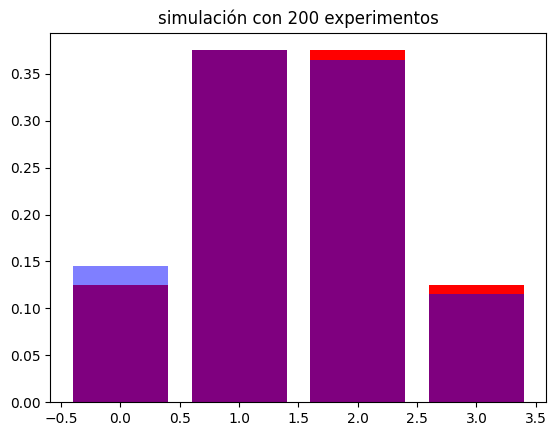

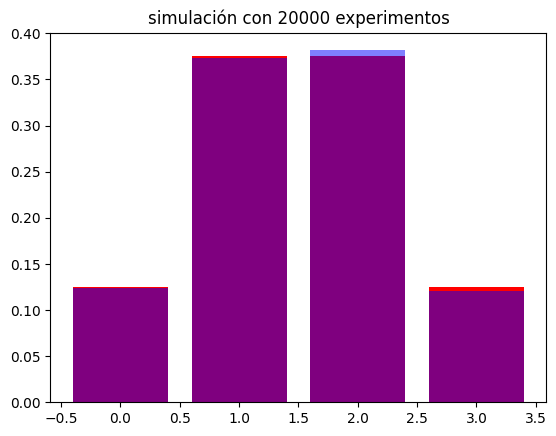

In [21]:
def plot_hist(num_trials):
    values = [0, 1, 2, 3]
    arr = []
    for _ in range(num_trials):
        arr.append(binomial(3, 0.5))
    distribucion_simulada = np.unique(arr, return_counts=True)[1] / len(arr)
    distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
    plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
    plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
    plt.title('simulación con {} experimentos'.format(num_trials))
    plt.show()


plot_hist(200)
plot_hist(20000)

## Distribución normal teórica


$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución
* $\sigma$: desviación estándar de la distribución

In [22]:
# definir la funcion gaussiana.
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

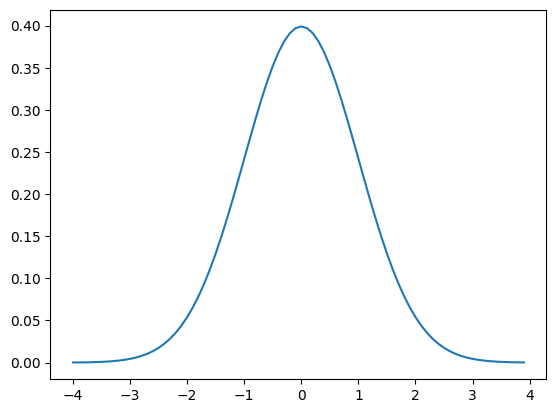

In [23]:
x = np.arange(-4,4,0.1)
y = gaussian(x, 0.0, 1.0)

plt.plot(x, y)

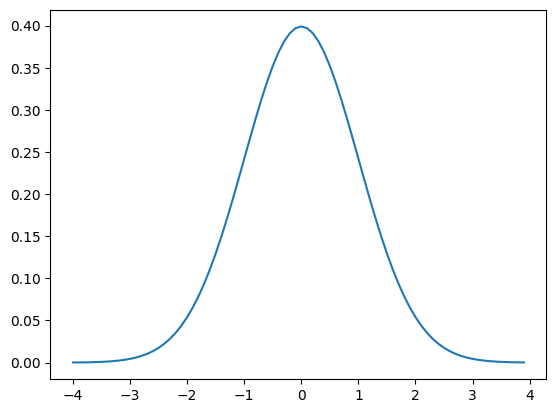

In [24]:
dist = norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)

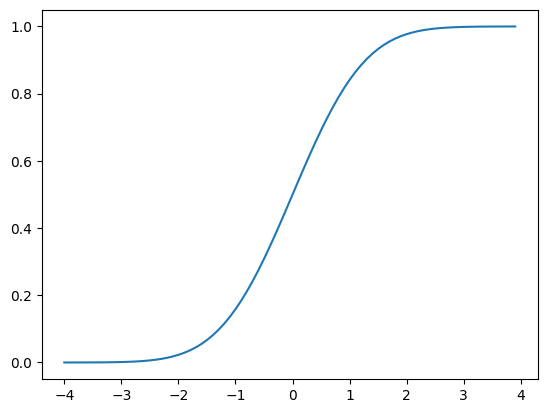

In [25]:
dist = norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = [dist.cdf(value) for value in x]
plt.plot(x,y)

In [27]:
df_s057 = pd.read_excel('../data/s057.xls')


In [28]:
df_s057.head()

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,length (x.1mm),NaN,NaN,NaN
3,36,NaN,Bin,Frequency
4,37,NaN,36-38,2


In [29]:
df_s057.shape

(103, 4)

In [32]:
arr = df_s057['Normally Distributed Housefly Wing Lengths'].values[4:]

In [33]:
np.unique(arr, return_counts=True)

(array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55], dtype=object),
 array([ 1,  2,  2,  4,  6,  7,  8,  9, 10, 10,  9,  8,  7,  6,  4,  2,  2,
         1,  1]))

In [34]:
values, dist = np.unique(arr, return_counts=True)

In [35]:
values

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55], dtype=object)

In [36]:
dist

array([ 1,  2,  2,  4,  6,  7,  8,  9, 10, 10,  9,  8,  7,  6,  4,  2,  2,
        1,  1])

<BarContainer object of 19 artists>

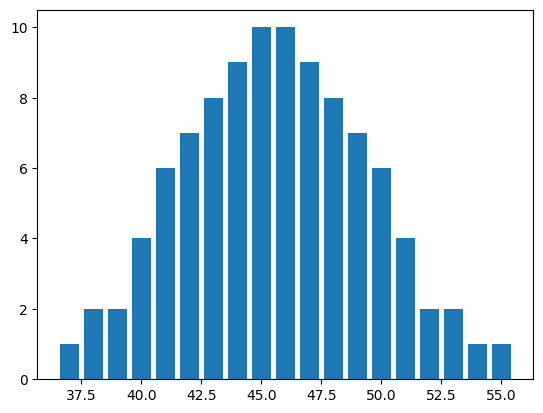

In [37]:
plt.bar(values, dist)

In [38]:
mu = arr.mean()

In [39]:
sigma = arr.std()

In [40]:
x = np.arange(30, 60, 0.1)

In [41]:
dist = norm(mu, sigma)

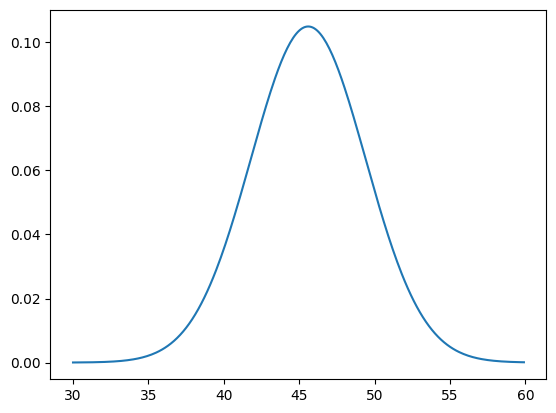

In [43]:
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

<BarContainer object of 19 artists>

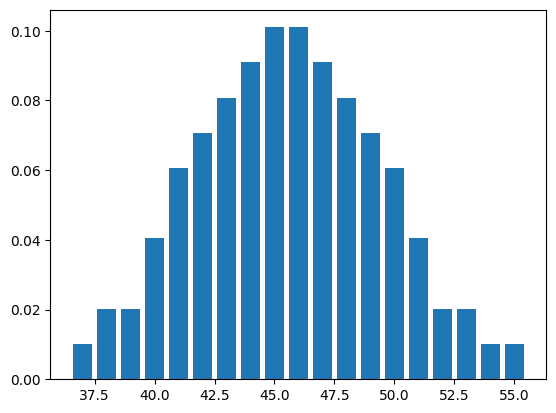

In [45]:
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))


<BarContainer object of 19 artists>

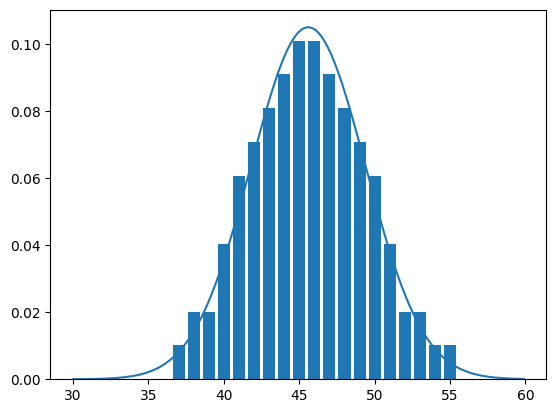

In [46]:
# estimación de la distribución de probabilidad
mu = arr.mean()

#distribución teórica
sigma = arr.std()
dist = norm(mu, sigma)
x = np.arange(30,60,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

# datos
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))